In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB,CategoricalNB

In [2]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,ConfusionMatrixDisplay

In [3]:
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt


In [4]:
url="http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

In [5]:
car_df=pd.read_csv(url,names=["buying","maint","doors","persons","lug_boot","safety","class"],sep=",")

In [6]:
car_df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [7]:
features=car_df.columns.to_list()
features

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [8]:
features.remove("class")
features

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [9]:
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [11]:
ord_encoder=OrdinalEncoder()
data_encoded=ord_encoder.fit_transform(car_df[features])
data_encoded

array([[3., 3., 0., 0., 2., 1.],
       [3., 3., 0., 0., 2., 2.],
       [3., 3., 0., 0., 2., 0.],
       ...,
       [1., 1., 3., 2., 0., 1.],
       [1., 1., 3., 2., 0., 2.],
       [1., 1., 3., 2., 0., 0.]])

In [15]:
car_df_encoded=pd.DataFrame(data_encoded,columns=features)

In [16]:
car_df_encoded.head()

,buying,maint,doors,persons,lug_boot,safety
0,3.0,3.0,0.0,0.0,2.0,1.0
1,3.0,3.0,0.0,0.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,1.0
4,3.0,3.0,0.0,0.0,1.0,2.0


In [18]:
data_encoded

array([[3., 3., 0., 0., 2., 1.],
       [3., 3., 0., 0., 2., 2.],
       [3., 3., 0., 0., 2., 0.],
       ...,
       [1., 1., 3., 2., 0., 1.],
       [1., 1., 3., 2., 0., 2.],
       [1., 1., 3., 2., 0., 0.]])

In [20]:
encoder=LabelEncoder()
target_encoded=encoder.fit_transform(car_df['class'])
target_encoded

array([2, 2, 2, ..., 2, 1, 3])

In [21]:
car_df_encoded['class']=target_encoded

In [22]:
car_df_encoded.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,2
1,3.0,3.0,0.0,0.0,2.0,2.0,2
2,3.0,3.0,0.0,0.0,2.0,0.0,2
3,3.0,3.0,0.0,0.0,1.0,1.0,2
4,3.0,3.0,0.0,0.0,1.0,2.0,2


In [23]:
encoder.inverse_transform(target_encoded)

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'good', 'vgood'],
      dtype=object)

In [24]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(car_df_encoded.values,i) 
            for i in range(len(features))]

In [25]:
vif['features']=features
vif

,vif,features
0,2.537474,buying
1,2.522938,maint
2,2.443242,doors
3,2.165404,persons
4,2.290247,lug_boot
5,2.240569,safety


In [27]:
x=car_df_encoded.drop('class',axis=1)
y=car_df_encoded['class']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [29]:
cnb=CategoricalNB()
cnb.fit(x_train,y_train)

CategoricalNB()

In [30]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [31]:
pred_cnb=cnb.predict(x_test)
pred_gnb=gnb.predict(x_test)

In [32]:
pred_cnb_probability=cnb.predict_proba(x_test)
pred_gnb_probability=gnb.predict_proba(x_test)

In [34]:
count_misclass_cnb=(y_test != pred_cnb).sum()
accuracycnb=accuracy_score(pred_cnb,y_test)
print("misclassification= ",count_misclass_cnb)
print("accuracy",accuracycnb)

misclassification=  59
accuracy 0.8294797687861272


In [35]:
count_misclass_gnb=(y_test != pred_gnb).sum()
accuracygnb=accuracy_score(pred_gnb,y_test)
print("misclassification= ",count_misclass_gnb)
print("accuracy",accuracygnb)

misclassification=  140
accuracy 0.5953757225433526


In [36]:
print(classification_report(y_test,pred_cnb))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65        85
           1       0.71      0.33      0.45        15
           2       0.88      0.96      0.92       232
           3       1.00      0.43      0.60        14

    accuracy                           0.83       346
   macro avg       0.82      0.59      0.66       346
weighted avg       0.83      0.83      0.82       346



In [38]:
print(classification_report(y_test,pred_gnb))

              precision    recall  f1-score   support

           0       0.36      0.09      0.15        85
           1       0.00      0.00      0.00        15
           2       0.83      0.79      0.81       232
           3       0.14      1.00      0.24        14

    accuracy                           0.60       346
   macro avg       0.33      0.47      0.30       346
weighted avg       0.65      0.60      0.59       346



C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [39]:
from sklearn.metrics import roc_auc_score

In [44]:
print(roc_auc_score(y_test,pred_cnb_probability,multi_class='ovr',average='weighted'))

0.9669570048414919


In [45]:
print(roc_auc_score(y_test,pred_gnb_probability,multi_class='ovr',average='weighted'))

0.7562978915872106


In [46]:
confusion_matrix(y_test,pred_cnb)

array([[ 54,   1,  30,   0],
       [ 10,   5,   0,   0],
       [  9,   1, 222,   0],
       [  8,   0,   0,   6]], dtype=int64)

In [47]:
confusion_matrix(y_test,pred_gnb)

array([[  8,   0,  33,  44],
       [  5,   0,   5,   5],
       [  9,   0, 184,  39],
       [  0,   0,   0,  14]], dtype=int64)

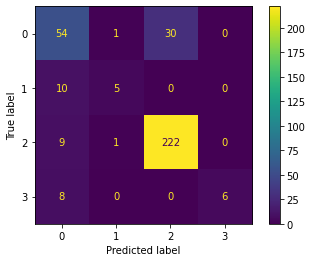

In [51]:
cm=confusion_matrix(y_test,pred_cnb,labels=cnb.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cnb.classes_)
disp.plot()

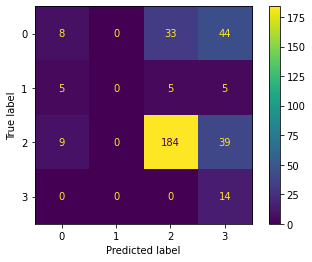

In [52]:
cm2=confusion_matrix(y_test,pred_gnb,labels=gnb.classes_)
disp2=ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=gnb.classes_)
disp2.plot()